In [ ]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

from PIL import Image
from tqdm import trange
from lab3.model import *

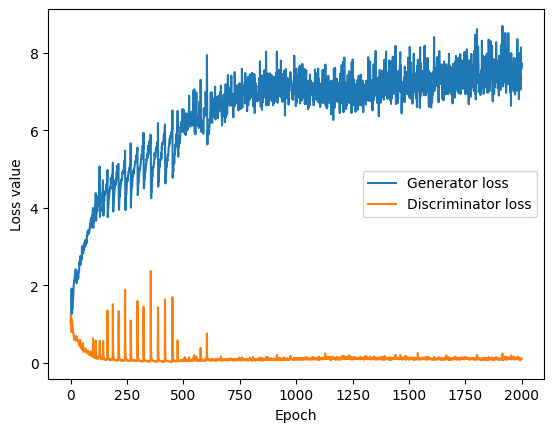

In [2]:
with open("checkpoints/loss_epoch2000.pickle", "rb") as file:
    loss_hist = pickle.load(file)

plt.plot(loss_hist["G"], label="Generator loss")
plt.plot(loss_hist["D"], label="Discriminator loss")
plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.legend(loc="best")
plt.show()

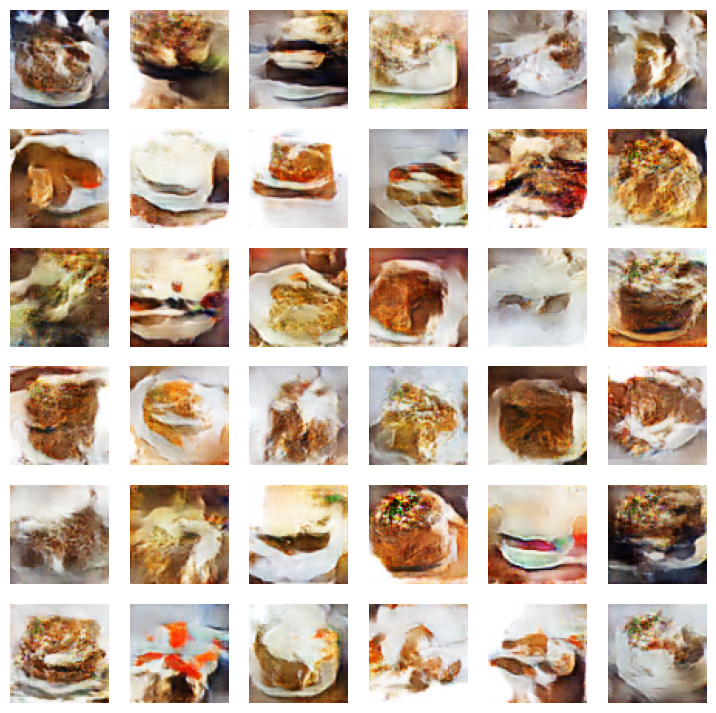

In [3]:
params = torch.load("checkpoints/params_epoch500.pt", weights_only=False)
G = Generator()
G.load_state_dict(params["G_state_dict"])

show(G(torch.randn(36, 128)).detach())

In [4]:
def find_latent(target_img: Tensor, save_intermediate: str | None = None) -> Tensor:
    if save_intermediate is not None:
        os.makedirs(save_intermediate, exist_ok=True)

    epochs = 10_000
    log_period = 100

    noise = torch.randn(1, 128)
    noise.requires_grad = True
    criterion = F.mse_loss
    optimizer = optim.SGD([noise], lr=1e-1, momentum=0.99, nesterov=True)

    for epoch in (pbar := trange(epochs)):
        optimizer.zero_grad()
        fake_img = G(noise)
        loss = criterion(fake_img, target_img)
        loss.backward()
        optimizer.step()

        pbar.set_description(f"Loss {loss.item():.4f}")
        if (epoch in range(100) or (epoch + 1) % log_period == 0) and save_intermediate is not None:
            show(fake_img.detach(), savepath=f"{save_intermediate}/img_{epoch+1}.jpg")

    return noise

Loss 0.0608: 100%|██████████| 10000/10000 [00:55<00:00, 181.69it/s]


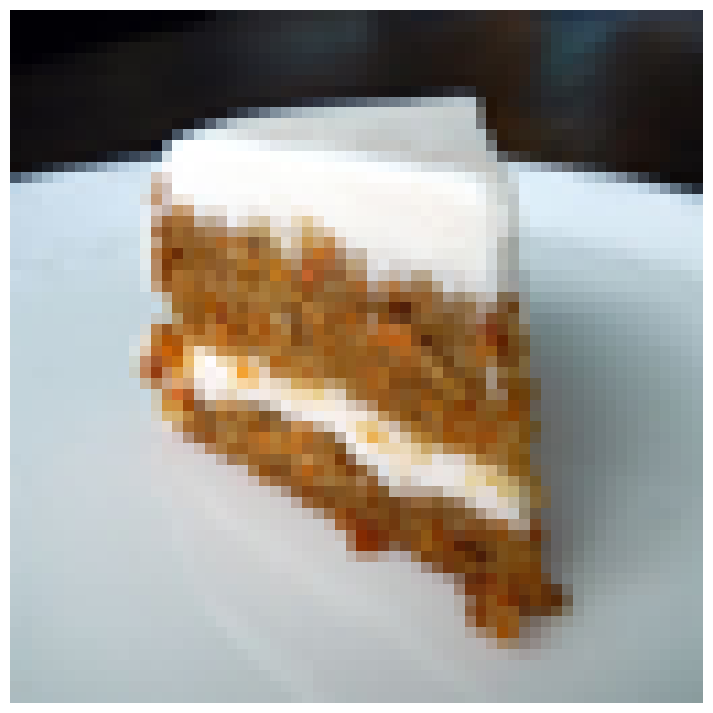

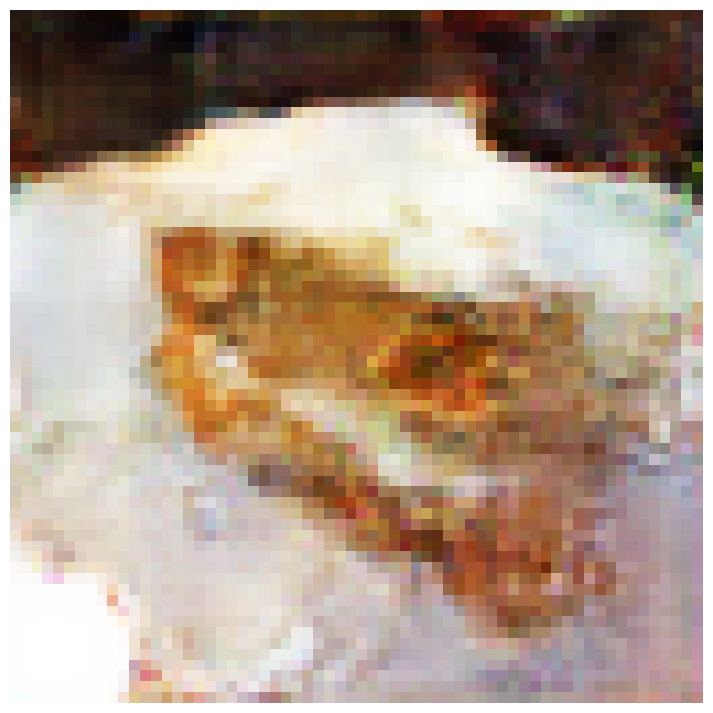

In [5]:
target_img_cake1 = np.array(Image.open("crawled_cakes/027_99511daa.jpg").convert("RGB").resize((64, 64)))
target_img_cake1 = target_img_cake1.transpose(2, 0, 1)
target_img_cake1 = target_img_cake1.astype(np.float32)
target_img_cake1 = (target_img_cake1 / 127.5) - 1.0
target_img_cake1 = Tensor(target_img_cake1).unsqueeze(0).float().to(DEVICE)

latent_cake_1 = find_latent(target_img_cake1, save_intermediate="./out_noise_1")

show(target_img_cake1)
show(G(latent_cake_1).detach())

Loss 0.2615: 100%|██████████| 10000/10000 [00:45<00:00, 220.32it/s]


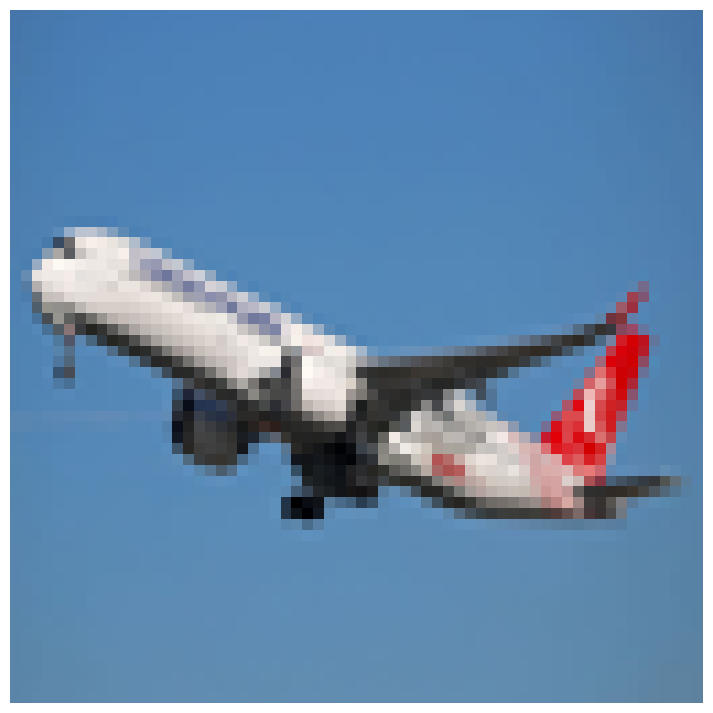

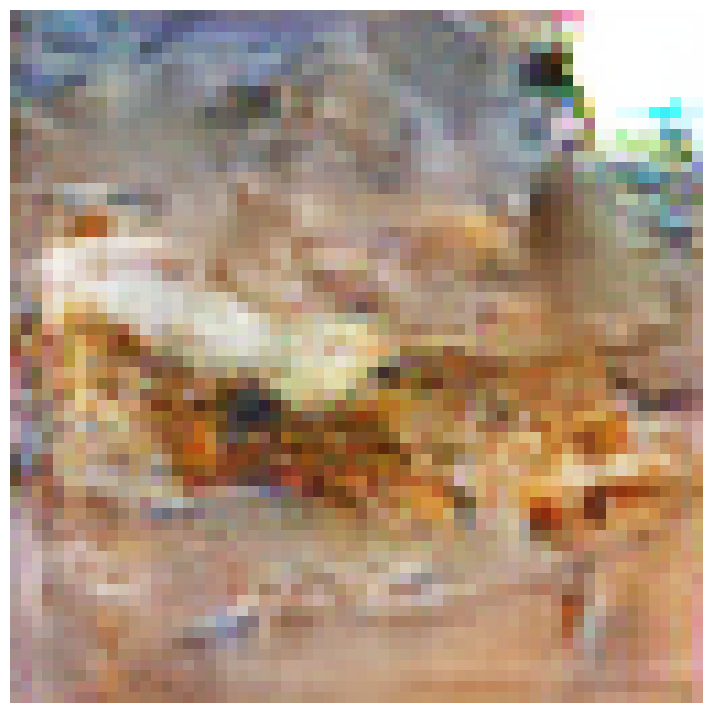

In [ ]:
target_img_plane = np.array(Image.open("./other/plane.png").convert("RGB").resize((64, 64)))
target_img_plane = target_img_plane.transpose(2, 0, 1)
target_img_plane = target_img_plane.astype(np.float32)
target_img_plane = (target_img_plane / 127.5) - 1.0
target_img_plane = Tensor(target_img_plane).unsqueeze(0).float().to(DEVICE)

latent_plane = find_latent(target_img_plane)

show(target_img_plane)
show(G(latent_plane).detach())

Loss 0.0547: 100%|██████████| 10000/10000 [00:54<00:00, 183.86it/s]


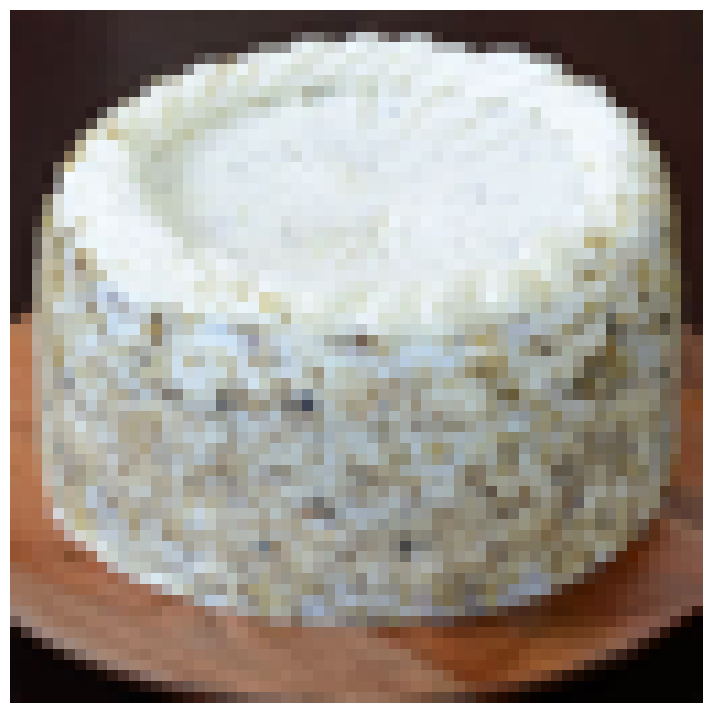

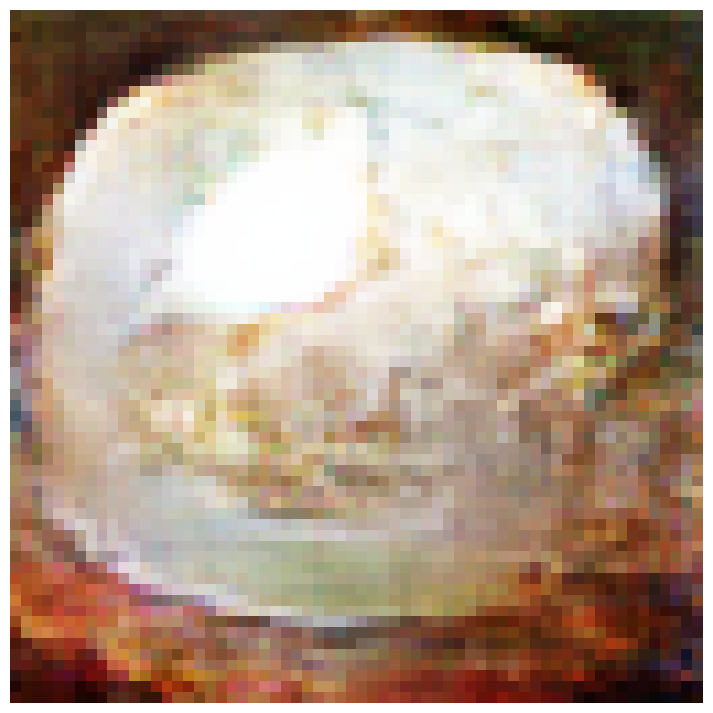

In [7]:
target_img_cake2 = np.array(Image.open("crawled_cakes/039_d8bd02ed.jpg").convert("RGB").resize((64, 64)))
target_img_cake2 = target_img_cake2.transpose(2, 0, 1)
target_img_cake2 = target_img_cake2.astype(np.float32)
target_img_cake2 = (target_img_cake2 / 127.5) - 1.0
target_img_cake2 = Tensor(target_img_cake2).unsqueeze(0).float().to(DEVICE)

latent_cake_2 = find_latent(target_img_cake2, save_intermediate="./out_noise_2")

show(target_img_cake2)
show(G(latent_cake_2).detach())

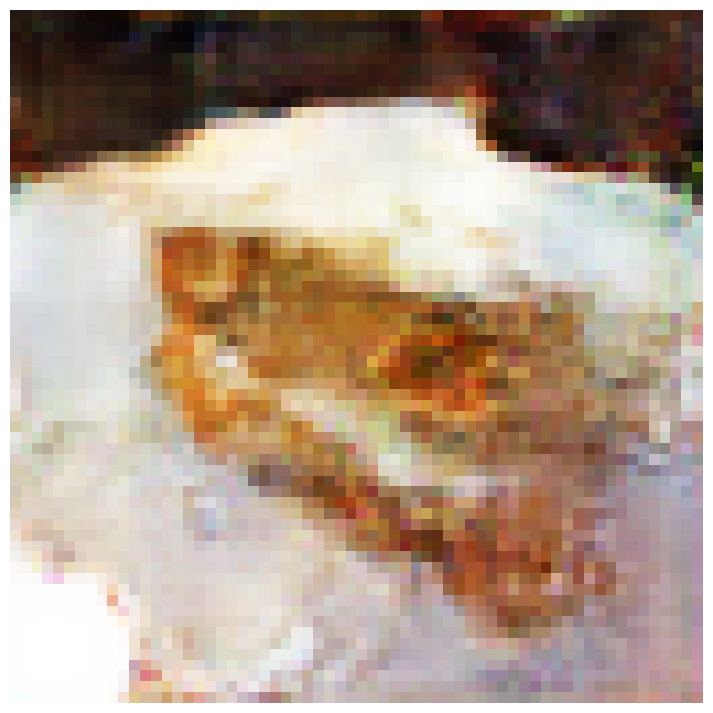

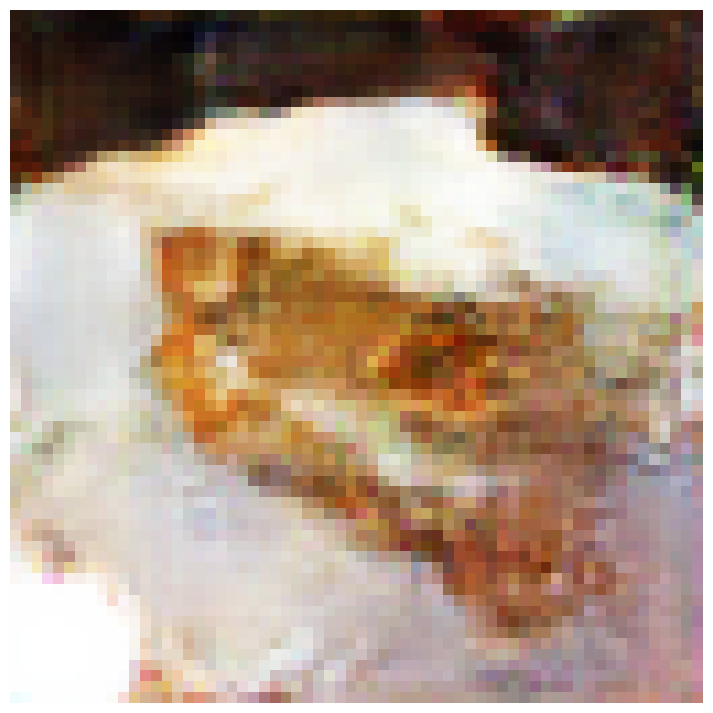

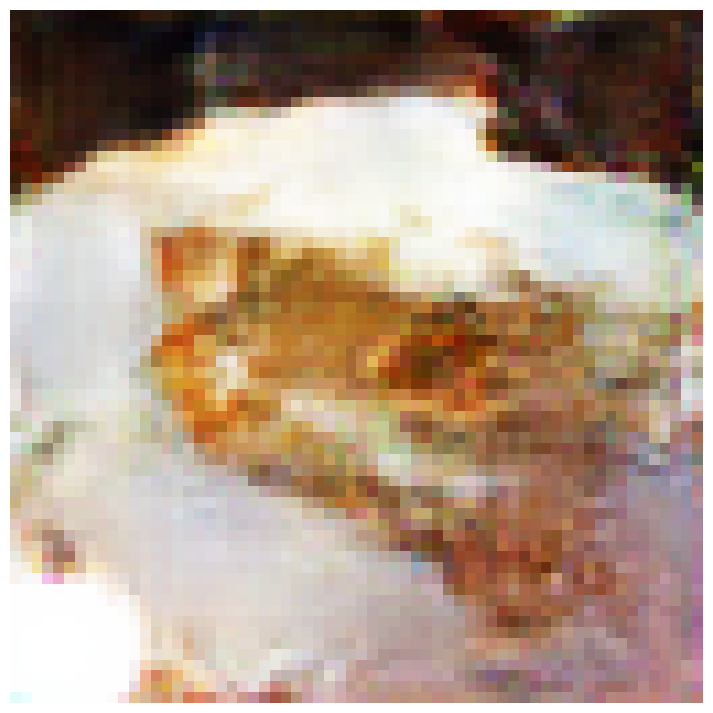

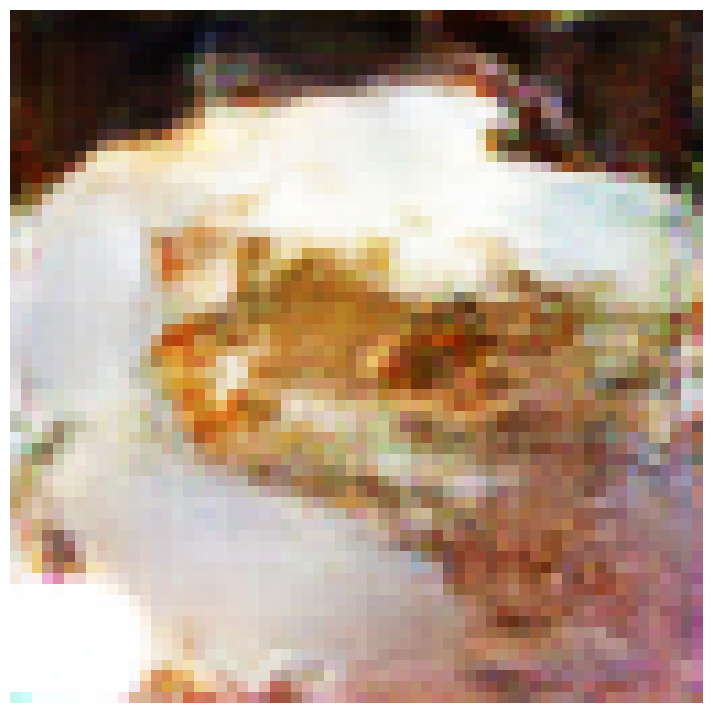

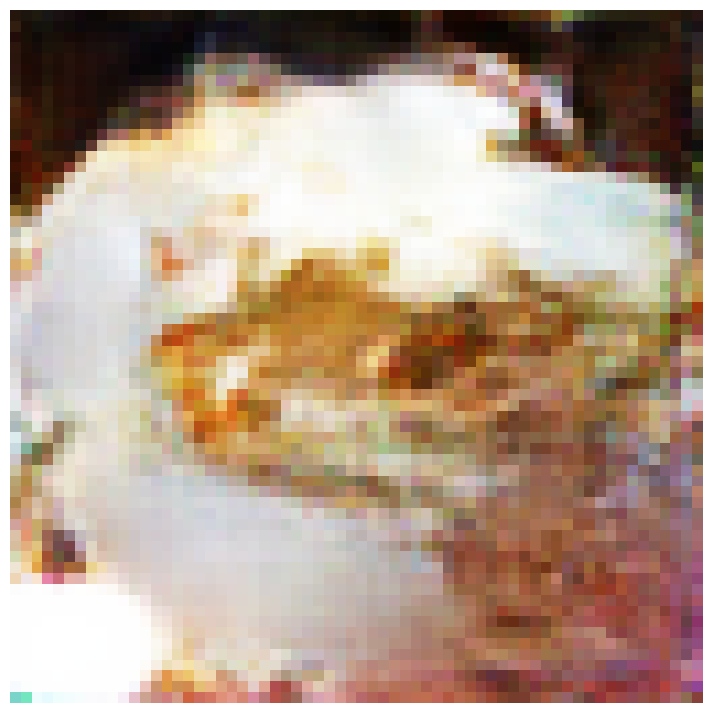

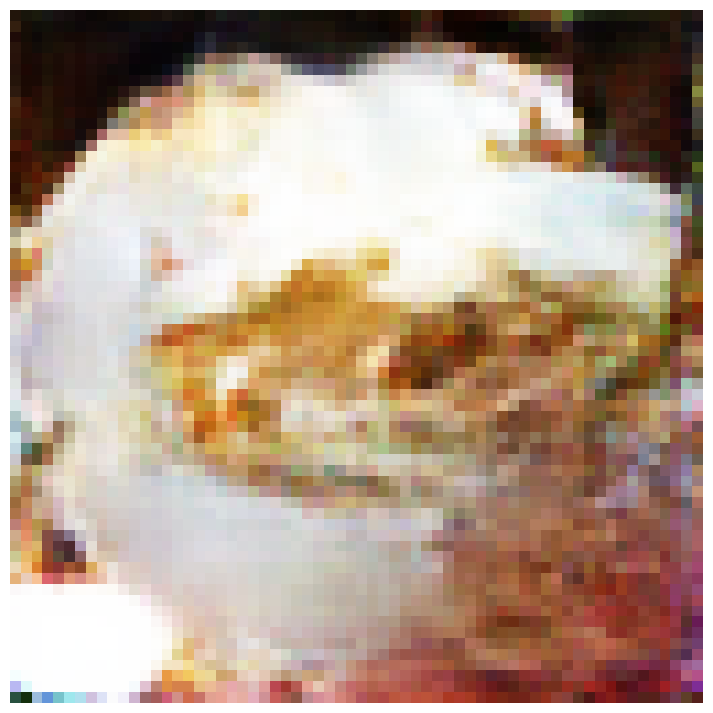

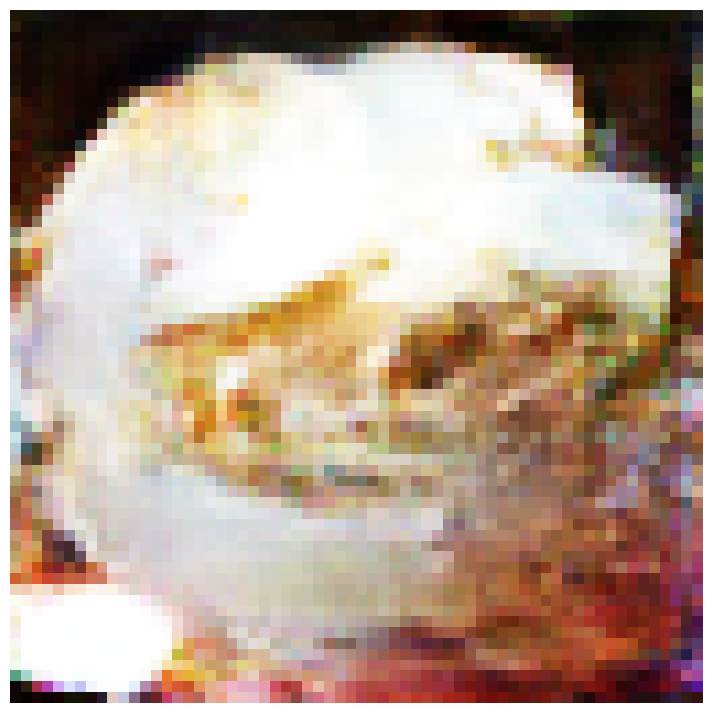

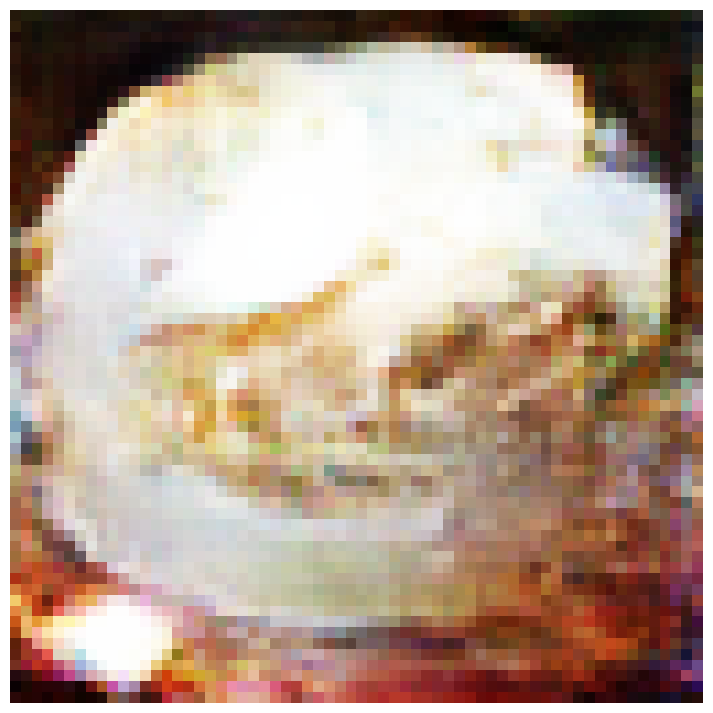

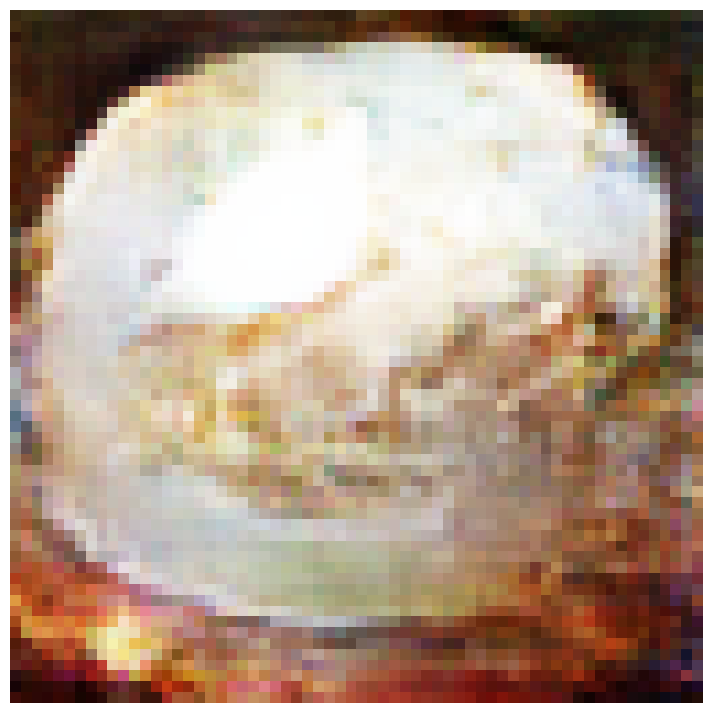

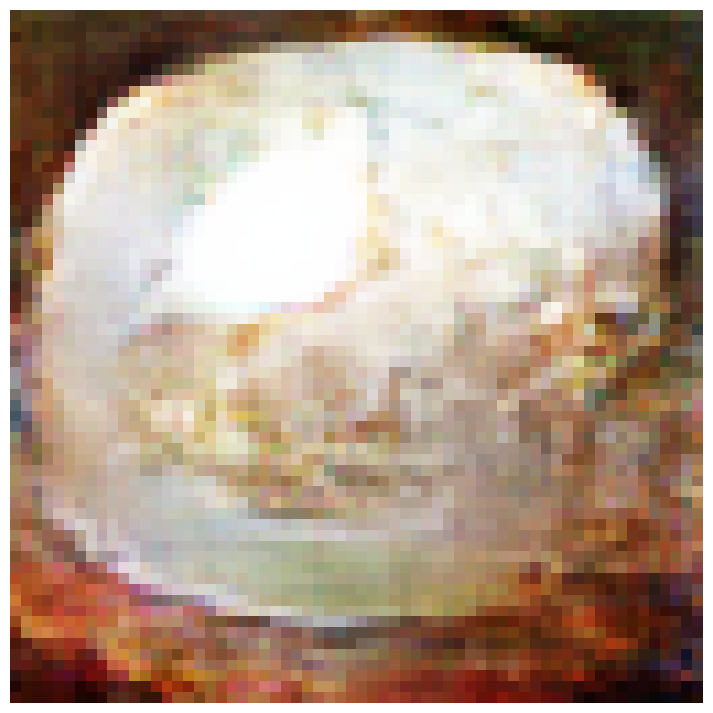

In [8]:
latent_cake_intermediate = lambda alpha: latent_cake_1 + alpha * (latent_cake_2 - latent_cake_1)

for alpha in np.linspace(0, 1, 10):
    show(G(latent_cake_intermediate(alpha)).detach())